In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

Matplotlib is building the font cache; this may take a moment.


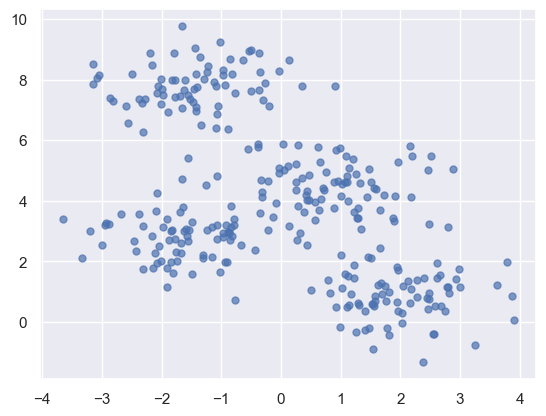

In [4]:
from sklearn.datasets import make_blobs

points, cluster_indexes = make_blobs(n_samples=300, centers=4, cluster_std=0.8, random_state=0)

x = points[:,0]
y = points[:,1]

plt.scatter(x,y,s=25, alpha=0.7)

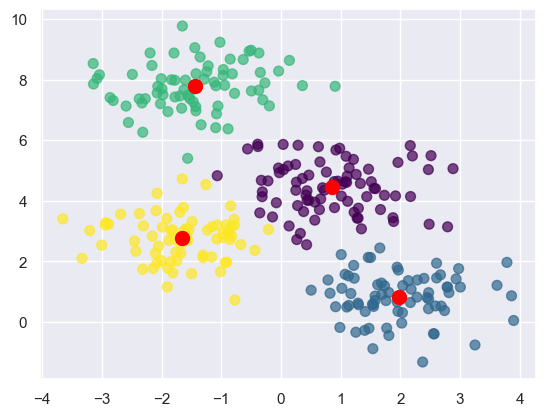

In [11]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4, random_state=0)
kmeans.fit(points)
predicted_cluster_indexes = kmeans.predict(points)

plt.scatter(x,y, c=predicted_cluster_indexes, s=50, alpha=0.7, cmap='viridis')

centers = kmeans.cluster_centers_

plt.scatter(centers[:,0], centers[:,1], c='red', s=100)

Text(0, 0.5, 'Inertia')

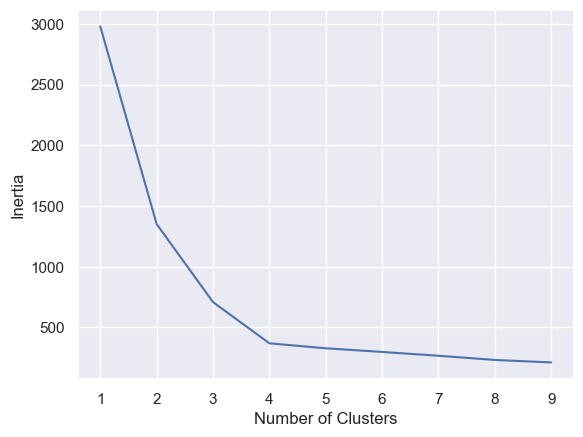

In [12]:
inertias=[]

for i in range(1,10):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(points)
    inertias.append(kmeans.inertia_)

plt.plot(range(1,10), inertias)
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')

In [16]:
import pandas as pd

customers = pd.read_csv('https://oreil.ly/Md86Y')
customers.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


Text(0, 0.5, 'Spending Score')

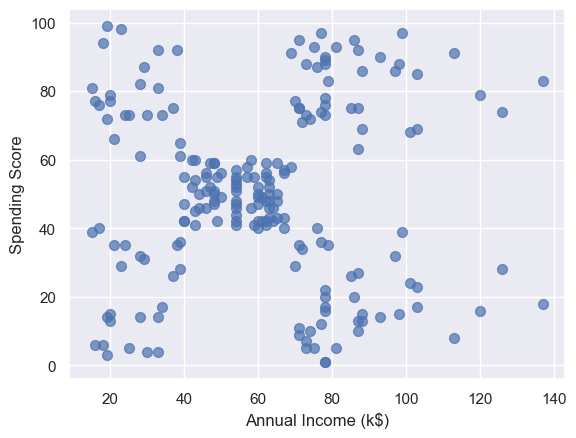

In [18]:
points = customers.iloc[:,3:5].values
x = points[:,0]
y = points[:,1]

plt.scatter(x,y,s=50,alpha=0.7)
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score')

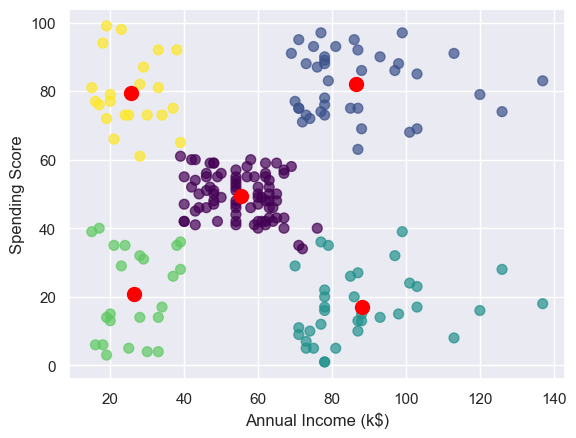

In [19]:
kmeans = KMeans(n_clusters=5,random_state=0)
kmeans.fit(points)
predicted_cluster_indexes=kmeans.predict(points)

plt.scatter(x,y, c=predicted_cluster_indexes,s=50,alpha=0.7,cmap='viridis')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=100)

In [21]:
df = customers.copy()
df['Cluster'] = kmeans.predict(points)
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,Male,19,15,39,3
1,2,Male,21,15,81,4
2,3,Female,20,16,6,3
3,4,Female,23,16,77,4
4,5,Female,31,17,40,3


In [23]:
from sklearn.preprocessing import LabelEncoder

df = customers.copy()
encoder = LabelEncoder()
df['Gender'] = encoder.fit_transform(df['Gender'])
df.head()


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


Text(0, 0.5, 'Inertia')

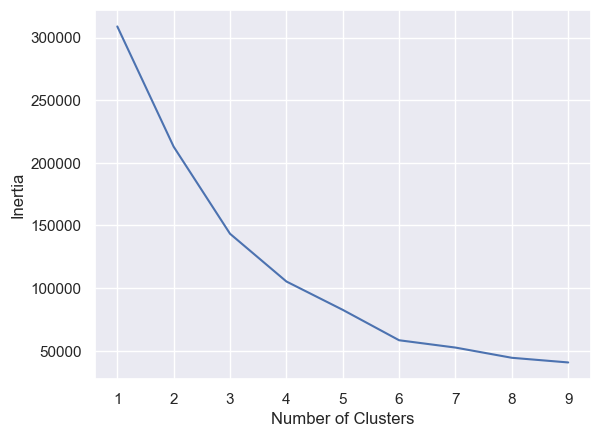

In [24]:
points = df.iloc[:,1:5].values
inertias = []

for i in range(1,10):
    kmeans = KMeans(n_clusters=i,random_state=0)
    kmeans.fit(points)
    inertias.append(kmeans.inertia_)

plt.plot(range(1,10), inertias)
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')

In [25]:
kmeans = KMeans(n_clusters=6, random_state=0)
kmeans.fit(points)

df['Cluster'] = kmeans.predict(points)
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,1,19,15,39,2
1,2,1,21,15,81,5
2,3,0,20,16,6,2
3,4,0,23,16,77,5
4,5,0,31,17,40,2


In [26]:
results = pd.DataFrame(columns = ['Cluster', 'Average Age', 'Average Income',
                                   'Average Spending Index', 'Number of Females',
                                   'Number of Males'])

for i, center in enumerate(kmeans.cluster_centers_):
    age = center[1]    # Average age for current cluster
    income = center[2] # Average income for current cluster
    spend = center[3]  # Average spending score for current cluster

    gdf = df[df['Cluster'] == i]
    females = gdf[gdf['Gender'] == 0].shape[0]
    males = gdf[gdf['Gender'] == 1].shape[0]

    results.loc[i] = ([i, age, income, spend, females, males])

results.head()

,Cluster,Average Age,Average Income,Average Spending Index,Number of Females,Number of Males
0,0.0,56.340909,53.704545,49.386364,25.0,19.0
1,1.0,32.692308,86.538462,82.128205,21.0,18.0
2,2.0,44.318182,25.772727,20.272727,13.0,9.0
3,3.0,41.647059,88.735294,16.764706,15.0,19.0
4,4.0,27.315789,57.500000,48.447368,24.0,14.0
